<a href="https://colab.research.google.com/github/ducsuibot/dl_basic/blob/main/Python_Basics_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

In [83]:
test = "hello world"

In [84]:
print("test:"+test)

test:hello world


Exercise 2 - basic_sigmoid

In [85]:
import math
import numpy as np

In [86]:
def basic_sigmoid(x):
  # x -- A scalar
  return 1.0/(1+np.exp(-x))

In [87]:
print("basic_sigmoid = " + str(basic_sigmoid(1)))

basic_sigmoid = 0.7310585786300049


Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful.

code trên bị sai do ko dùng numpy nên dùng python sẽ xuất ra 1 vector cùng số pt giống x

In [88]:
import numpy as np
x = np.array([1,2,3])
print(basic_sigmoid(x))

[0.73105858 0.88079708 0.95257413]


In [89]:
print(x+3)

[4 5 6]


Exercise 3 - sigmoid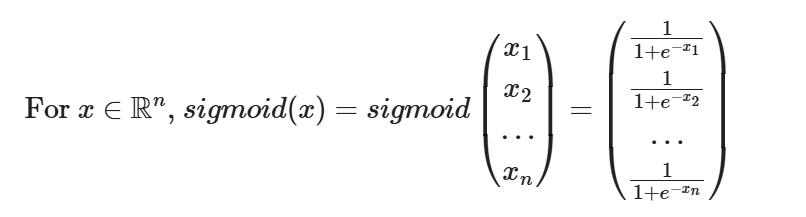

In [90]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))

In [91]:
x = np.array([1,2,3])
print("sigmoid = " + str(sigmoid(x)))

sigmoid = [0.73105858 0.88079708 0.95257413]


Exercise 4 - sigmoid_derivative

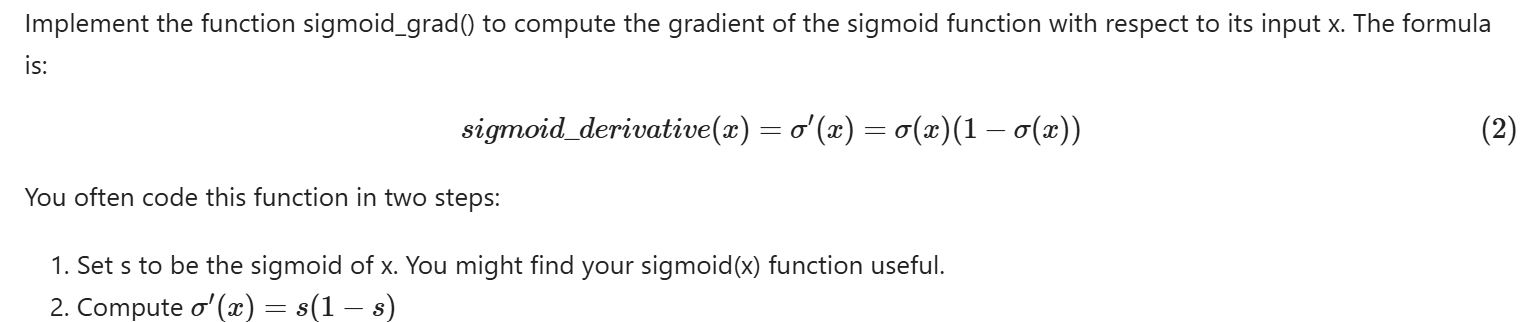

In [92]:
def sigmoid_derivative(x):
  z = 1.0/(1+np.exp(-x))
  dz = z * (1-z)
  return dz

In [93]:
x = np.array([1,2,3])
print("sigmoid_derivative = " + str(sigmoid_derivative(x)))

sigmoid_derivative = [0.19661193 0.10499359 0.04517666]


Khi đọc dữ liệu 3D tức là hình ảnh thì ta thường chuyển nó về 1 chiều

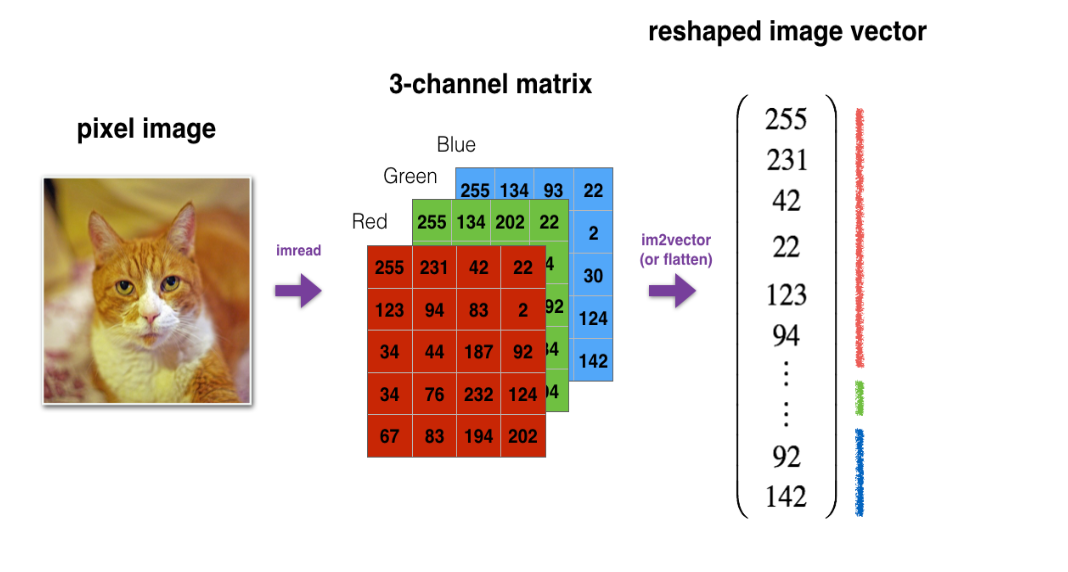

Exercise 5 - image2vector

In [94]:
def image2vector(image):
  #image -- a numpy array of shape (length, height, depth)
  return image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)

In [95]:
image = np.array([[[ 0.67826139,  0.29380381],
                     [ 0.90714982,  0.52835647],
                     [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]])
print(image.shape)
scaling_image = image2vector(image)
print(scaling_image.shape)
print(scaling_image)

(3, 3, 2)
(18, 1)
[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


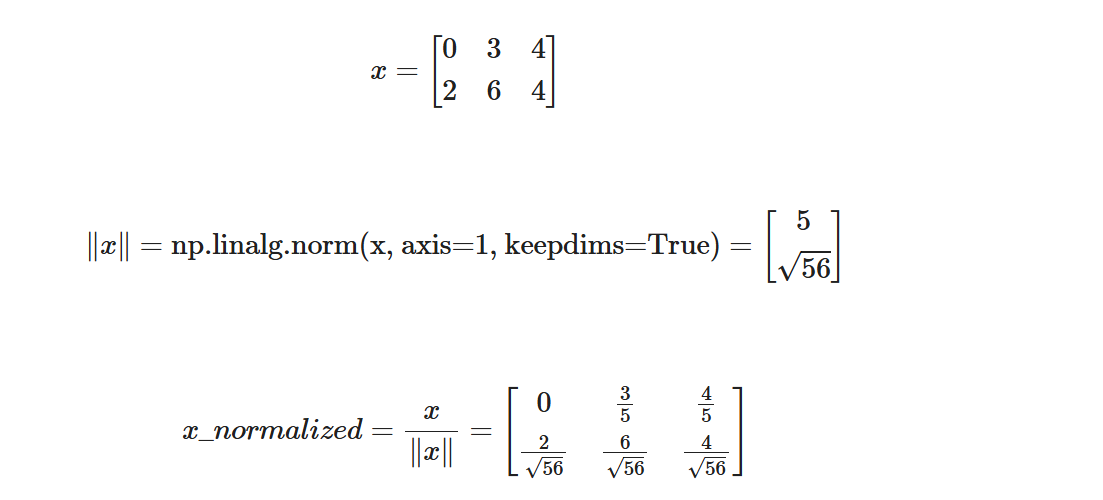

Exercise 6 - normalize_rows

In [96]:
def normalize_rows(x):
  #x -- A numpy matrix of shape (n, m)
  x_norm = np.linalg.norm(x,keepdims = True,axis = 1)
  x_norm = x / x_norm
  return x_norm

In [97]:
x = np.array([[0,3,4],
              [1,6,4]])
print(normalize_rows(x))

[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


In [98]:
def normalize_rows(x):
  #x -- A numpy matrix of shape (n, m)
  x_norm = np.linalg.norm(x,keepdims = True,axis = 0)
  x_norm = x / x_norm
  return x_norm

In [99]:
print(normalize_rows(x))

[[0.         0.4472136  0.70710678]
 [1.         0.89442719 0.70710678]]


Soft_max

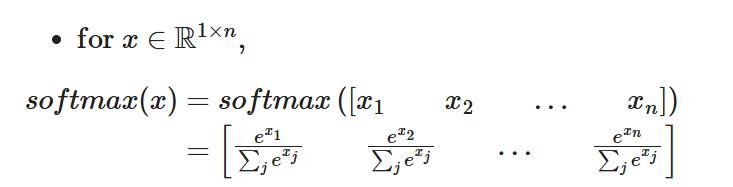

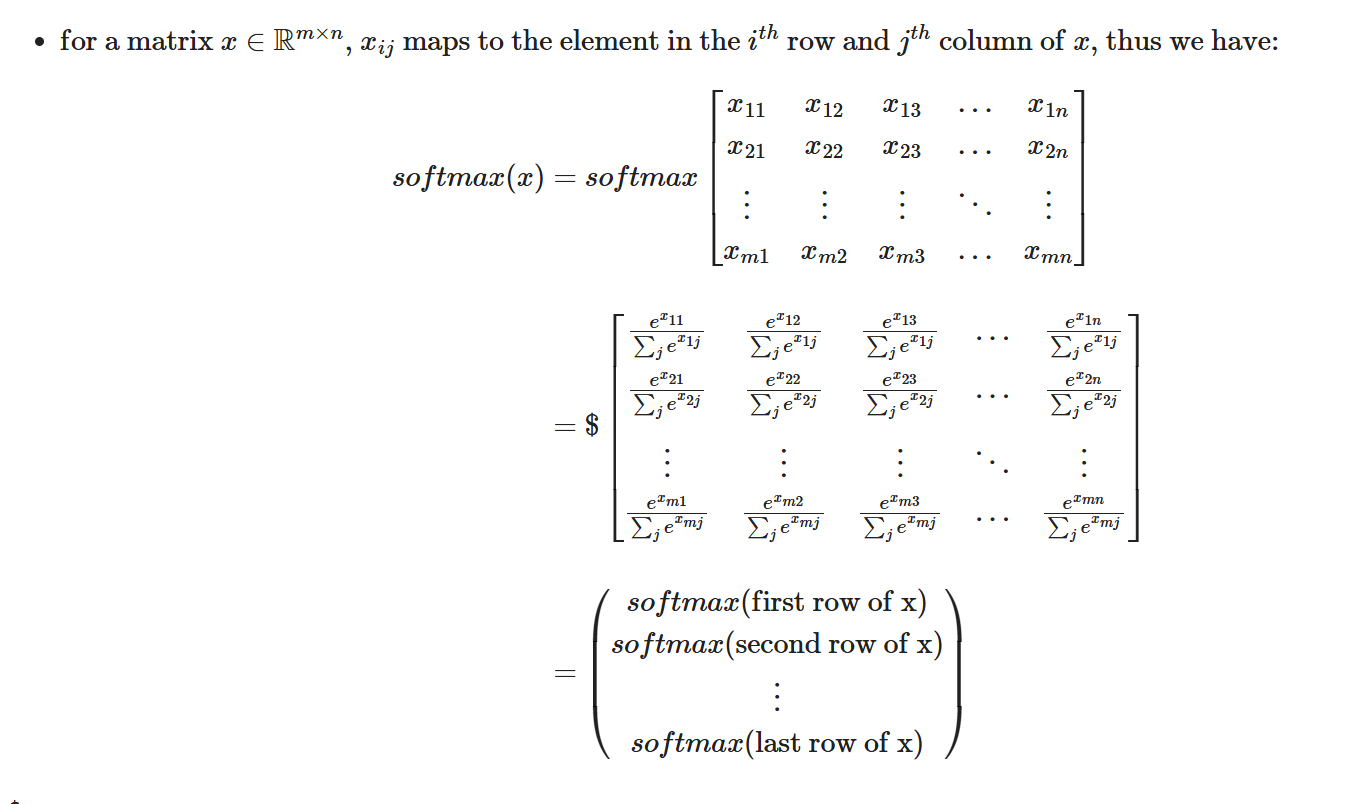

In [100]:
def softmax(x):
  #x -- A numpy matrix of shape (m,n)
  x_exp = np.exp(x)
  print(x_exp.shape)
  x_sum = np.sum(x_exp,keepdims=True,axis = 1)
  print(x_sum.shape)
  return x_exp/x_sum

In [101]:
x = np.array([[9,2,5,0,0],
              [7,5,0,0,0]])
print(x.shape)
print(softmax(x))

(2, 5)
(2, 5)
(2, 1)
[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


Vectorization

In [113]:
import time
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]
time_1 = time.process_time()
dot = 0
for i in range(len(x1)):
  dot += x1[i]*x2[i]
time_2 = time.process_time()
print(time_2-time_1)
tic = time.process_time()
outer = np.zeros((len(x1), len(x2))) # we create a len(x1)*len(x2) matrix with only zeros

for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i] * x2[j]
toc = time.process_time()
print(toc-tic)
tic = time.process_time()
mul = np.zeros(len(x1))

for i in range(len(x1)):
    mul[i] = x1[i] * x2[i]
toc = time.process_time()
print(toc-tic)

0.00011554200000318815
0.00029362300000457253
0.00011903000000046404


Implement the L1 and L2 loss functions

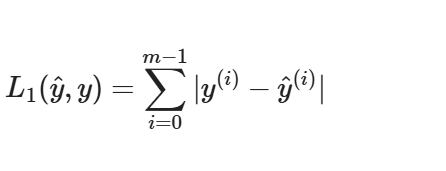

In [120]:
def l1(y_hat,y):
  loss = abs(y_hat-y)
  return sum(loss)

In [121]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(l1(yhat, y)))


L1 = 1.1


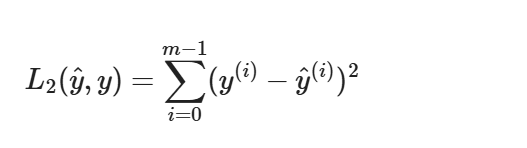

In [122]:
def l2(y_hat,y):
  return np.dot(y_hat-y,y_hat-y)

In [123]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

print("L2 = " + str(l2(yhat, y)))

L2 = 0.43
